Objective:
The objective of this assignment is to apply Decision Tree Classification to a given dataset, analyse the performance of the model, and interpret the results.


Tasks:
1. Data Preparation:
Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).


In [1543]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [1545]:
file = 'heart_disease.xlsx'

In [1547]:
df = pd.read_excel(file, sheet_name='Heart_disease')  # Specify the sheet name

In [1549]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [1551]:
#age	Age in years
#Gender	Gender ; Male - 1, Female -0
#cp	Chest pain type
#trestbps	Resting blood pressure
#chol	cholesterol measure
#fbs	(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
#restecg	"ecg observation at resting condition,   -- Value 0: normal
#        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
 #       -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria"
#thalch	maximum heart rate achieved
#exang	exercise induced angina
#oldpeak	ST depression induced by exercise relative to rest
#slope	the slope of the peak exercise ST segment
#thal	Thal
#num	target [0=no heart disease; 1,2,3,4 = stages of heart disease ]


2. Exploratory Data Analysis (EDA):
Perform exploratory data analysis to understand the structure of the dataset.
Check for missing values, outliers, and inconsistencies in the data.
Visualize the distribution of features, including histograms, box plots, and correlation matrices


In [1554]:
# age	sex	cp	trestbps	chol	fbs	restecg	thalch	exang	oldpeak	slope	thal	num

In [1556]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [1558]:
df.rename(columns={'cp':'Chest_pain','trestbps':'blood_pressure','chol':'cholesterol','fbs':'fasting_blood_sugar','thalch':'max_heart_rate'},inplace=True)
df

,age,sex,Chest_pain,blood_pressure,cholesterol,fasting_blood_sugar,restecg,max_heart_rate,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [1560]:
df.dtypes

age                      int64
sex                     object
Chest_pain              object
blood_pressure           int64
cholesterol              int64
fasting_blood_sugar       bool
restecg                 object
max_heart_rate           int64
exang                   object
oldpeak                float64
slope                   object
thal                    object
num                      int64
dtype: object

In [1562]:
df['exang'].unique()

array([False, True, 'FALSE', 'TURE'], dtype=object)

In [1564]:
df['exang'] = df['exang'].astype(str)

In [1566]:
 # replacing only value not the datatype , replace takes 2 parameters
df['exang'].replace({'FALSE': 'False', 'TURE': 'True'}, inplace=True)

C:\Users\shubham\AppData\Local\Temp\ipykernel_7020\2889910262.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['exang'].replace({'FALSE': 'False', 'TURE': 'True'}, inplace=True)


In [1568]:
df['exang'].unique()

array(['False', 'True'], dtype=object)

In [1570]:
df['exang'].value_counts()

exang
False    535
True     373
Name: count, dtype: int64

In [1572]:
label_encoder = LabelEncoder()

# Apply LabelEncoder to the specific column
df['sex'] = label_encoder.fit_transform(df['sex'])
df['fasting_blood_sugar'] = label_encoder.fit_transform(df['fasting_blood_sugar'])
df['exang'] = label_encoder.fit_transform(df['exang'])

In [1574]:
df

,age,sex,Chest_pain,blood_pressure,cholesterol,fasting_blood_sugar,restecg,max_heart_rate,exang,oldpeak,slope,thal,num
0,63,1,typical angina,145,233,1,lv hypertrophy,150,0,2.3,downsloping,fixed defect,0
1,41,1,atypical angina,135,203,0,normal,132,0,0.0,flat,fixed defect,0
2,57,1,asymptomatic,140,192,0,normal,148,0,0.4,flat,fixed defect,0
3,52,1,typical angina,118,186,0,lv hypertrophy,190,0,0.0,flat,fixed defect,0
4,57,1,asymptomatic,110,201,0,normal,126,1,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,asymptomatic,125,0,0,normal,120,0,1.5,upsloping,reversable defect,4
904,62,1,asymptomatic,166,170,0,st-t abnormality,120,1,3.0,flat,reversable defect,4
905,56,1,non-anginal,170,0,0,lv hypertrophy,123,1,2.5,downsloping,normal,4
906,56,1,non-anginal,144,208,1,st-t abnormality,105,1,NaN,downsloping,fixed defect,4


In [1576]:
df['exang'].value_counts()

exang
0    535
1    373
Name: count, dtype: int64

In [1578]:
df['exang'].unique()

array([0, 1])

In [1580]:
df.dtypes

age                      int64
sex                      int32
Chest_pain              object
blood_pressure           int64
cholesterol              int64
fasting_blood_sugar      int64
restecg                 object
max_heart_rate           int64
exang                    int32
oldpeak                float64
slope                   object
thal                    object
num                      int64
dtype: object

In [1582]:
df['Chest_pain'].value_counts()

Chest_pain
asymptomatic       495
non-anginal        203
atypical angina    165
typical angina      45
Name: count, dtype: int64

In [1584]:
df['restecg'].value_counts()

restecg
normal              542
lv hypertrophy      187
st-t abnormality    179
Name: count, dtype: int64

In [1586]:
df['slope'].value_counts()

slope
flat           453
upsloping      298
downsloping    157
Name: count, dtype: int64

In [1588]:
df['thal'].value_counts()

thal
normal               386
reversable defect    346
fixed defect         176
Name: count, dtype: int64

In [1590]:
df['Chest_pain'] = label_encoder.fit_transform(df['Chest_pain'])
df['restecg'] = label_encoder.fit_transform(df['restecg'])
df['slope'] = label_encoder.fit_transform(df['slope'])
df['thal'] = label_encoder.fit_transform(df['thal'])


In [1592]:
df

,age,sex,Chest_pain,blood_pressure,cholesterol,fasting_blood_sugar,restecg,max_heart_rate,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,0,2.3,0,0,0
1,41,1,1,135,203,0,1,132,0,0.0,1,0,0
2,57,1,0,140,192,0,1,148,0,0.4,1,0,0
3,52,1,3,118,186,0,0,190,0,0.0,1,0,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,0,1.5,2,2,4
904,62,1,0,166,170,0,2,120,1,3.0,1,2,4
905,56,1,2,170,0,0,0,123,1,2.5,0,1,4
906,56,1,2,144,208,1,2,105,1,NaN,0,0,4


In [1594]:
df.describe()      # all are converted to numerical form

,age,sex,Chest_pain,blood_pressure,cholesterol,fasting_blood_sugar,restecg,max_heart_rate,exang,oldpeak,slope,thal,num
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000,908.000000,908.000000
mean,53.791850,0.790749,0.777533,133.430617,201.484581,0.203744,0.991189,135.957048,0.410793,0.891253,1.155286,1.187225,1.008811
std,9.158031,0.406998,0.958374,20.401608,112.097949,0.403003,0.635177,26.804929,0.492249,1.093875,0.691023,0.735141,1.144436
min,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000,0.000000
25%,47.750000,1.000000,0.000000,120.000000,176.750000,0.000000,1.000000,118.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,224.000000,0.000000,1.000000,138.000000,0.000000,0.500000,1.000000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,144.000000,270.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,2.000000,2.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,2.000000,4.000000


In [1596]:
df.dtypes

age                      int64
sex                      int32
Chest_pain               int32
blood_pressure           int64
cholesterol              int64
fasting_blood_sugar      int64
restecg                  int32
max_heart_rate           int64
exang                    int32
oldpeak                float64
slope                    int32
thal                     int32
num                      int64
dtype: object

3. Feature Engineering:
If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.


In [1599]:
df.info()  # oldpeak column contains missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  908 non-null    int64  
 1   sex                  908 non-null    int32  
 2   Chest_pain           908 non-null    int32  
 3   blood_pressure       908 non-null    int64  
 4   cholesterol          908 non-null    int64  
 5   fasting_blood_sugar  908 non-null    int64  
 6   restecg              908 non-null    int32  
 7   max_heart_rate       908 non-null    int64  
 8   exang                908 non-null    int32  
 9   oldpeak              846 non-null    float64
 10  slope                908 non-null    int32  
 11  thal                 908 non-null    int32  
 12  num                  908 non-null    int64  
dtypes: float64(1), int32(6), int64(6)
memory usage: 71.1 KB


In [1601]:
df.isna().sum()   

age                     0
sex                     0
Chest_pain              0
blood_pressure          0
cholesterol             0
fasting_blood_sugar     0
restecg                 0
max_heart_rate          0
exang                   0
oldpeak                62
slope                   0
thal                    0
num                     0
dtype: int64

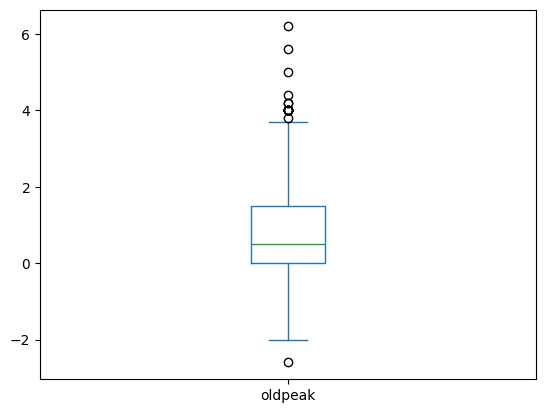

In [1603]:
df['oldpeak'].plot(kind='box')
plt.show()

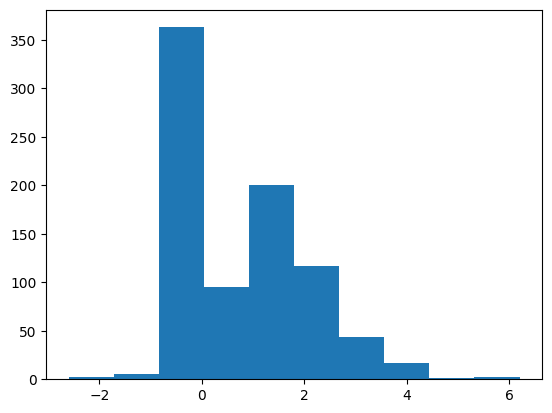

In [1605]:
plt.hist(df.oldpeak)
plt.show()

In [1607]:
df['oldpeak'].fillna(df['oldpeak'].median(),inplace=True)

In [1609]:
df.isna().sum()

age                    0
sex                    0
Chest_pain             0
blood_pressure         0
cholesterol            0
fasting_blood_sugar    0
restecg                0
max_heart_rate         0
exang                  0
oldpeak                0
slope                  0
thal                   0
num                    0
dtype: int64

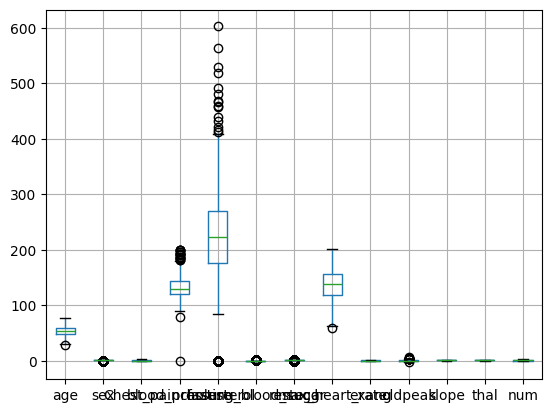

In [1611]:
df.boxplot()
plt.show()

In [1613]:
# as outliers are present , so we will replace the outliers using median
q1 = df['oldpeak'].quantile(0.25)   # lower quartile 

In [1615]:
q3 = df['oldpeak'].quantile(0.75)   # upper quartile

In [1617]:
iqr = q3-q1

In [1619]:
upper_extreme = q3 + (1.5*iqr)
lower_extreme = q1 - (1.5*iqr)

In [1621]:
upper_extreme     # replacing with the upper level outlires

3.75

In [1623]:
lower_extreme        # replacing with lower level outliers

-2.25

In [1625]:
df[df['oldpeak']>3.75]

,age,sex,Chest_pain,blood_pressure,cholesterol,fasting_blood_sugar,restecg,max_heart_rate,exang,oldpeak,slope,thal,num
149,59,1,3,178,270,0,0,145,0,4.2,0,2,0
537,52,1,0,160,246,0,2,82,1,4.0,1,0,1
587,50,1,0,140,231,0,2,140,1,5.0,1,0,1
722,63,1,0,140,187,0,0,144,1,4.0,2,2,2
773,61,1,0,120,282,0,2,135,1,4.0,0,0,3
792,62,0,0,160,164,0,0,145,0,6.2,0,2,3
794,55,1,0,140,217,0,1,111,1,5.6,0,2,3
795,56,0,0,200,288,1,0,133,1,4.0,0,2,3
814,51,1,0,140,298,0,1,122,1,4.2,1,2,3
839,74,1,0,150,258,1,2,130,1,4.0,0,2,3


In [1627]:
df[df['oldpeak']>3.75].shape[0]    # now all these 15 outlier values of oldpeak column should be replaced by upper extreme value = 3.75 for only oldpeak column

15

In [1629]:
df[df['oldpeak']<-2.25]     # same for lower extreme

,age,sex,Chest_pain,blood_pressure,cholesterol,fasting_blood_sugar,restecg,max_heart_rate,exang,oldpeak,slope,thal,num
525,46,1,0,100,0,0,2,133,0,-2.6,1,1,1


In [1631]:
# capping outliers of oldpeak column  for upper extreme outliers
df.loc[df['oldpeak']>3.75,'oldpeak'] = 3.75

In [1633]:
# capping outliers of oldpeak column  for lower extreme outliers
df.loc[df['oldpeak']<-2.25,'oldpeak'] = -2.25

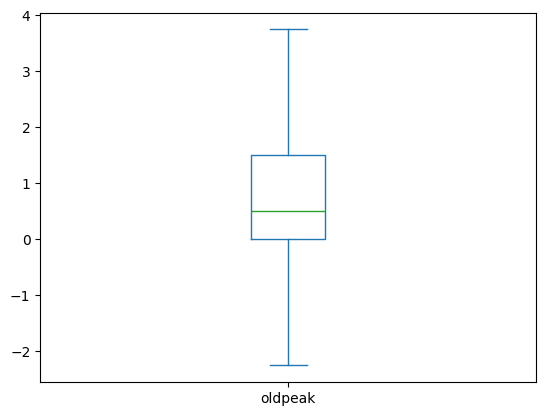

In [1635]:
df['oldpeak'].plot(kind='box')
plt.show()

In [1637]:
# age	sex	Chest_pain	blood_pressure	cholesterol	fasting_blood_sugar	restecg	max_heart_rate

In [1639]:
def outlier_detection(data,colname):
    q1 = data[colname].quantile(0.25)
    q3 = data[colname].quantile(0.75)
    iqr = q3-q1

    upper_extreme = q3 + (1.5*iqr)
    lower_extreme = q1 - (1.5*iqr)

    return print('lower_extreme:-',lower_extreme,', upper_extreme:-',upper_extreme,', q1:-',q1,', q3:-',q3)

In [1641]:
outlier_detection(df,'age')

lower_extreme:- 29.375 , upper_extreme:- 78.375 , q1:- 47.75 , q3:- 60.0


In [1643]:
df.loc[df['age']>78.375,'age'] = 78.375
df.loc[df['age']<29.375,'age'] = 29.375

C:\Users\shubham\AppData\Local\Temp\ipykernel_7020\1278174836.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '78.375' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['age']>78.375,'age'] = 78.375


In [1645]:
outlier_detection(df,'Chest_pain')
df.loc[df['Chest_pain']>5.0,'Chest_pain'] = 5.0
df.loc[df['Chest_pain']<-3.0,'Chest_pain'] = -3.0

lower_extreme:- -3.0 , upper_extreme:- 5.0 , q1:- 0.0 , q3:- 2.0


In [1647]:
outlier_detection(df,'blood_pressure')
df.loc[df['blood_pressure']>180.0,'blood_pressure'] = 180.0
df.loc[df['blood_pressure']<84.0,'blood_pressure'] = 84.0

lower_extreme:- 84.0 , upper_extreme:- 180.0 , q1:- 120.0 , q3:- 144.0


In [1649]:
outlier_detection(df,'Chest_pain')
df.loc[df['Chest_pain']>5.0,'Chest_pain'] = 5.0
df.loc[df['Chest_pain']<-3.0,'Chest_pain'] = -3.0

lower_extreme:- -3.0 , upper_extreme:- 5.0 , q1:- 0.0 , q3:- 2.0


In [1651]:
outlier_detection(df,'cholesterol')
df.loc[df['cholesterol']>409.875,'cholesterol'] = 409.875
df.loc[df['cholesterol']<36.875,'cholesterol'] = 36.875

lower_extreme:- 36.875 , upper_extreme:- 409.875 , q1:- 176.75 , q3:- 270.0


C:\Users\shubham\AppData\Local\Temp\ipykernel_7020\885783460.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '409.875' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['cholesterol']>409.875,'cholesterol'] = 409.875


In [1653]:
outlier_detection(df,'max_heart_rate')
df.loc[df['max_heart_rate']>213.0,'max_heart_rate'] = 213.0
df.loc[df['max_heart_rate']<61.0 ,'max_heart_rate'] = 61.0 

lower_extreme:- 61.0 , upper_extreme:- 213.0 , q1:- 118.0 , q3:- 156.0


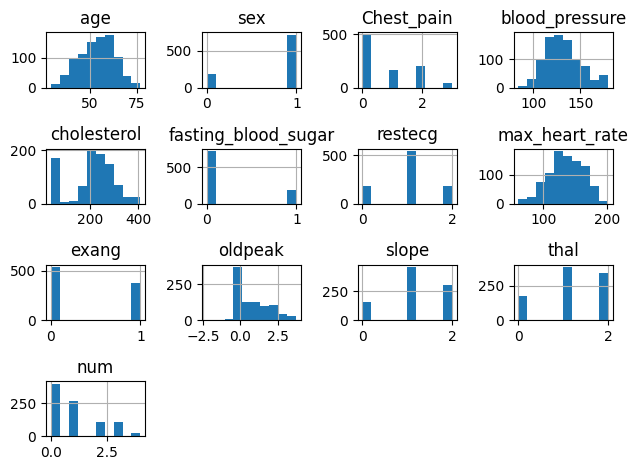

In [1655]:
df.hist()
plt.tight_layout()
plt.show()

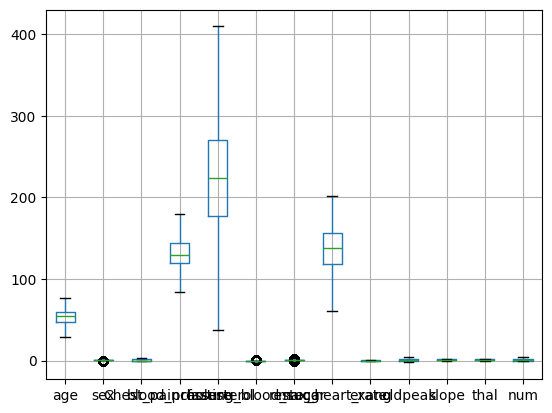

In [1656]:
df.boxplot()     # all the outlires are treated
plt.show()

In [1657]:
sns.pairplot(df)

In [1658]:
df.corr()

,age,sex,Chest_pain,blood_pressure,cholesterol,fasting_blood_sugar,restecg,max_heart_rate,exang,oldpeak,slope,thal,num
age,1.000000,0.052224,-0.067587,0.262066,-0.092411,0.176701,-0.007589,-0.328068,0.192620,0.220790,-0.054596,0.058686,0.326493
sex,0.052224,1.000000,-0.125130,0.019198,-0.194489,0.092167,0.078158,-0.178794,0.187388,0.094826,-0.045065,0.068439,0.259605
Chest_pain,-0.067587,-0.125130,1.000000,0.012528,0.061485,-0.045228,-0.072048,0.248206,-0.343597,-0.174821,0.092177,-0.080093,-0.312848
blood_pressure,0.262066,0.019198,0.012528,1.000000,0.126479,0.112497,0.057852,-0.131777,0.151029,0.141790,0.009184,0.064021,0.142645
cholesterol,-0.092411,-0.194489,0.061485,0.126479,1.000000,-0.112116,-0.193553,0.194575,-0.027632,0.033895,0.048489,-0.015627,-0.228308
fasting_blood_sugar,0.176701,0.092167,-0.045228,0.112497,-0.112116,1.000000,0.067320,-0.065456,0.027807,0.011890,-0.026636,-0.017255,0.156268
restecg,-0.007589,0.078158,-0.072048,0.057852,-0.193553,0.067320,1.000000,-0.195220,0.085640,-0.047956,-0.084796,-0.112161,0.036508
max_heart_rate,-0.328068,-0.178794,0.248206,-0.131777,0.194575,-0.065456,-0.195220,1.000000,-0.349266,-0.115305,0.224065,0.006162,-0.323060
exang,0.192620,0.187388,-0.343597,0.151029,-0.027632,0.027807,0.085640,-0.349266,1.000000,0.364562,-0.161810,0.085812,0.359549
oldpeak,0.220790,0.094826,-0.174821,0.141790,0.033895,0.011890,-0.047956,-0.115305,0.364562,1.000000,-0.178639,0.094072,0.406053


In [1661]:
sns.heatmap(df.corr())

<Axes: >

In [1662]:
sc = StandardScaler()
scaled_df = pd.DataFrame(sc.fit_transform(df),columns=df.columns)

In [1663]:
scaled_df

,age,sex,Chest_pain,blood_pressure,cholesterol,fasting_blood_sugar,restecg,max_heart_rate,exang,oldpeak,slope,thal,num
0,1.006104,0.514416,2.320276,0.607417,0.264845,1.976894,-1.561352,0.524203,-0.834983,1.411045,-1.672770,-1.615852,-0.881977
1,-1.397775,0.514416,0.232258,0.089009,-0.045006,-0.505844,0.013879,-0.147763,-0.834983,-0.834669,-0.224843,-1.615852,-0.881977
2,0.350500,0.514416,-0.811752,0.348213,-0.158618,-0.505844,0.013879,0.449540,-0.834983,-0.444110,-0.224843,-1.615852,-0.881977
3,-0.195836,0.514416,2.320276,-0.792285,-0.220589,-0.505844,-1.561352,2.017461,-0.834983,-0.834669,-0.224843,-1.615852,-0.881977
4,0.350500,0.514416,-0.811752,-1.207012,-0.065663,-0.505844,0.013879,-0.371752,1.197629,0.629927,-0.224843,-1.615852,-0.881977
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,-0.086568,0.514416,-0.811752,-0.429400,-1.760808,-0.505844,0.013879,-0.595741,-0.834983,0.629927,1.223083,1.106214,2.615119
904,0.896837,0.514416,-0.811752,1.696074,-0.385843,-0.505844,1.589110,-0.595741,1.197629,2.094523,-0.224843,1.106214,2.615119
905,0.241233,0.514416,1.276267,1.903437,-1.760808,-0.505844,-1.561352,-0.483747,1.197629,1.606325,-1.672770,-0.254819,2.615119
906,0.241233,0.514416,1.276267,0.555576,0.006636,1.976894,1.589110,-1.155713,1.197629,-0.346471,-1.672770,-1.615852,2.615119


In [1669]:
scaled_df.describe()

,age,sex,Chest_pain,blood_pressure,cholesterol,fasting_blood_sugar,restecg,max_heart_rate,exang,oldpeak,slope,thal,num
count,9.080000e+02,9.080000e+02,9.080000e+02,9.080000e+02,9.080000e+02,9.080000e+02,9.080000e+02,9.080000e+02,908.000000,9.080000e+02,9.080000e+02,908.000000,9.080000e+02
mean,4.695216e-17,-1.878087e-16,-9.390433e-17,4.538709e-16,1.408565e-16,-3.130144e-17,-5.477752e-17,-3.130144e-16,0.000000,-6.260288e-17,-6.260288e-17,0.000000,6.260288e-17
std,1.000551e+00,1.000551e+00,1.000551e+00,1.000551e+00,1.000551e+00,1.000551e+00,1.000551e+00,1.000551e+00,1.000551,1.000551e+00,1.000551e+00,1.000551,1.000551e+00
min,-2.668006e+00,-1.943951e+00,-8.117517e-01,-2.554873e+00,-1.760808e+00,-5.058441e-01,-1.561352e+00,-2.798297e+00,-0.834983,-3.031564e+00,-1.672770e+00,-1.615852,-8.819769e-01
25%,-6.602213e-01,5.144161e-01,-8.117517e-01,-6.886036e-01,-3.161260e-01,-5.058441e-01,1.387869e-02,-6.704039e-01,-0.834983,-8.346694e-01,-2.248432e-01,-0.254819,-8.819769e-01
50%,2.269882e-02,5.144161e-01,-8.117517e-01,-1.701954e-01,1.718899e-01,-5.058441e-01,1.387869e-02,7.622524e-02,-0.834983,-3.464706e-01,-2.248432e-01,-0.254819,-7.702855e-03
75%,6.783021e-01,5.144161e-01,1.276267e+00,5.555759e-01,6.469953e-01,-5.058441e-01,1.387869e-02,7.481914e-01,1.197629,6.299270e-01,1.223083e+00,1.106214,8.665712e-01
max,2.535845e+00,5.144161e-01,2.320276e+00,2.421845e+00,2.091677e+00,1.976894e+00,1.589110e+00,2.465438e+00,1.197629,2.826822e+00,1.223083e+00,1.106214,2.615119e+00


In [1671]:
scaled_df.corr()

,age,sex,Chest_pain,blood_pressure,cholesterol,fasting_blood_sugar,restecg,max_heart_rate,exang,oldpeak,slope,thal,num
age,1.000000,0.052224,-0.067587,0.262066,-0.092411,0.176701,-0.007589,-0.328068,0.192620,0.220790,-0.054596,0.058686,0.326493
sex,0.052224,1.000000,-0.125130,0.019198,-0.194489,0.092167,0.078158,-0.178794,0.187388,0.094826,-0.045065,0.068439,0.259605
Chest_pain,-0.067587,-0.125130,1.000000,0.012528,0.061485,-0.045228,-0.072048,0.248206,-0.343597,-0.174821,0.092177,-0.080093,-0.312848
blood_pressure,0.262066,0.019198,0.012528,1.000000,0.126479,0.112497,0.057852,-0.131777,0.151029,0.141790,0.009184,0.064021,0.142645
cholesterol,-0.092411,-0.194489,0.061485,0.126479,1.000000,-0.112116,-0.193553,0.194575,-0.027632,0.033895,0.048489,-0.015627,-0.228308
fasting_blood_sugar,0.176701,0.092167,-0.045228,0.112497,-0.112116,1.000000,0.067320,-0.065456,0.027807,0.011890,-0.026636,-0.017255,0.156268
restecg,-0.007589,0.078158,-0.072048,0.057852,-0.193553,0.067320,1.000000,-0.195220,0.085640,-0.047956,-0.084796,-0.112161,0.036508
max_heart_rate,-0.328068,-0.178794,0.248206,-0.131777,0.194575,-0.065456,-0.195220,1.000000,-0.349266,-0.115305,0.224065,0.006162,-0.323060
exang,0.192620,0.187388,-0.343597,0.151029,-0.027632,0.027807,0.085640,-0.349266,1.000000,0.364562,-0.161810,0.085812,0.359549
oldpeak,0.220790,0.094826,-0.174821,0.141790,0.033895,0.011890,-0.047956,-0.115305,0.364562,1.000000,-0.178639,0.094072,0.406053


In [1673]:
scaled_df

,age,sex,Chest_pain,blood_pressure,cholesterol,fasting_blood_sugar,restecg,max_heart_rate,exang,oldpeak,slope,thal,num
0,1.006104,0.514416,2.320276,0.607417,0.264845,1.976894,-1.561352,0.524203,-0.834983,1.411045,-1.672770,-1.615852,-0.881977
1,-1.397775,0.514416,0.232258,0.089009,-0.045006,-0.505844,0.013879,-0.147763,-0.834983,-0.834669,-0.224843,-1.615852,-0.881977
2,0.350500,0.514416,-0.811752,0.348213,-0.158618,-0.505844,0.013879,0.449540,-0.834983,-0.444110,-0.224843,-1.615852,-0.881977
3,-0.195836,0.514416,2.320276,-0.792285,-0.220589,-0.505844,-1.561352,2.017461,-0.834983,-0.834669,-0.224843,-1.615852,-0.881977
4,0.350500,0.514416,-0.811752,-1.207012,-0.065663,-0.505844,0.013879,-0.371752,1.197629,0.629927,-0.224843,-1.615852,-0.881977
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,-0.086568,0.514416,-0.811752,-0.429400,-1.760808,-0.505844,0.013879,-0.595741,-0.834983,0.629927,1.223083,1.106214,2.615119
904,0.896837,0.514416,-0.811752,1.696074,-0.385843,-0.505844,1.589110,-0.595741,1.197629,2.094523,-0.224843,1.106214,2.615119
905,0.241233,0.514416,1.276267,1.903437,-1.760808,-0.505844,-1.561352,-0.483747,1.197629,1.606325,-1.672770,-0.254819,2.615119
906,0.241233,0.514416,1.276267,0.555576,0.006636,1.976894,1.589110,-1.155713,1.197629,-0.346471,-1.672770,-1.615852,2.615119


4. Decision Tree Classification:
Split the dataset into training and testing sets (e.g., using an 80-20 split).
Implement a Decision Tree Classification model using a library like scikit-learn.
Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).


In [1676]:
df['num'].value_counts()   # target [0=no heart disease; 1,2,3,4 = stages of heart disease ]


num
0    399
1    265
2    109
3    107
4     28
Name: count, dtype: int64

In [1678]:
 x= df.iloc[:,0:12]

In [1680]:
x

,age,sex,Chest_pain,blood_pressure,cholesterol,fasting_blood_sugar,restecg,max_heart_rate,exang,oldpeak,slope,thal
0,63.0,1,3,145,233.000,1,0,150,0,2.3,0,0
1,41.0,1,1,135,203.000,0,1,132,0,0.0,1,0
2,57.0,1,0,140,192.000,0,1,148,0,0.4,1,0
3,52.0,1,3,118,186.000,0,0,190,0,0.0,1,0
4,57.0,1,0,110,201.000,0,1,126,1,1.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,53.0,1,0,125,36.875,0,1,120,0,1.5,2,2
904,62.0,1,0,166,170.000,0,2,120,1,3.0,1,2
905,56.0,1,2,170,36.875,0,0,123,1,2.5,0,1
906,56.0,1,2,144,208.000,1,2,105,1,0.5,0,0


In [1682]:
 y = df['num']

In [1684]:
y

0      0
1      0
2      0
3      0
4      0
      ..
903    4
904    4
905    4
906    4
907    4
Name: num, Length: 908, dtype: int64

In [1686]:
# Splitting data into training and testing data set. 20% data kept aside for testing
# random_state=40: To make splitting consistent across multiple runs.
# output will be 4 dataframes: xtrain, xtest, ytrain and ytest
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=0)

In [1688]:
x_train

,age,sex,Chest_pain,blood_pressure,cholesterol,fasting_blood_sugar,restecg,max_heart_rate,exang,oldpeak,slope,thal
372,37.0,0,0,130,173.000,0,2,184,0,0.0,2,1
304,41.0,1,1,125,269.000,0,1,144,0,0.0,2,2
524,41.0,1,0,130,172.000,0,2,130,0,2.0,1,2
85,71.0,0,1,160,302.000,0,1,162,0,0.4,2,1
530,56.0,0,1,120,279.000,0,1,150,0,1.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
835,61.0,1,3,142,200.000,1,2,100,0,1.5,0,1
192,72.0,1,2,160,36.875,0,0,114,0,1.6,1,2
629,55.0,1,3,140,295.000,0,2,136,0,0.0,1,1
559,59.0,1,0,140,36.875,0,2,117,1,1.0,1,2


In [1690]:
x_test

,age,sex,Chest_pain,blood_pressure,cholesterol,fasting_blood_sugar,restecg,max_heart_rate,exang,oldpeak,slope,thal
251,56.0,1,2,130,409.875,0,1,114,0,0.00,2,1
732,59.0,1,2,167,36.875,0,1,128,1,2.00,0,0
497,46.0,1,0,118,186.000,0,1,124,0,0.00,2,2
887,57.0,1,0,165,289.000,1,0,124,0,1.00,1,2
144,46.0,1,0,110,240.000,0,2,140,0,0.00,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
899,65.0,1,0,136,248.000,0,1,140,1,3.75,0,2
687,46.0,1,0,134,310.000,0,1,126,0,0.00,2,1
635,43.0,1,3,120,291.000,0,2,155,0,0.00,0,0
2,57.0,1,0,140,192.000,0,1,148,0,0.40,1,0


In [1692]:
y_test

251    0
732    2
497    1
887    4
144    0
      ..
899    4
687    2
635    1
2      0
402    1
Name: num, Length: 182, dtype: int64

In [1694]:
y_train

372    0
304    0
524    1
85     0
530    1
      ..
835    3
192    0
629    1
559    1
684    2
Name: num, Length: 726, dtype: int64

Building Decision Tree Classifier using Entropy Criteria

5. Hyperparameter Tuning:
Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.


In [1698]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=2,random_state=0) # C5.0, max_depth of tree = 3.
# To ensure that you get consistent results every time you run your Decision Tree model,
# you can set the random_state=0 parameter for the Decision Tree itself.
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

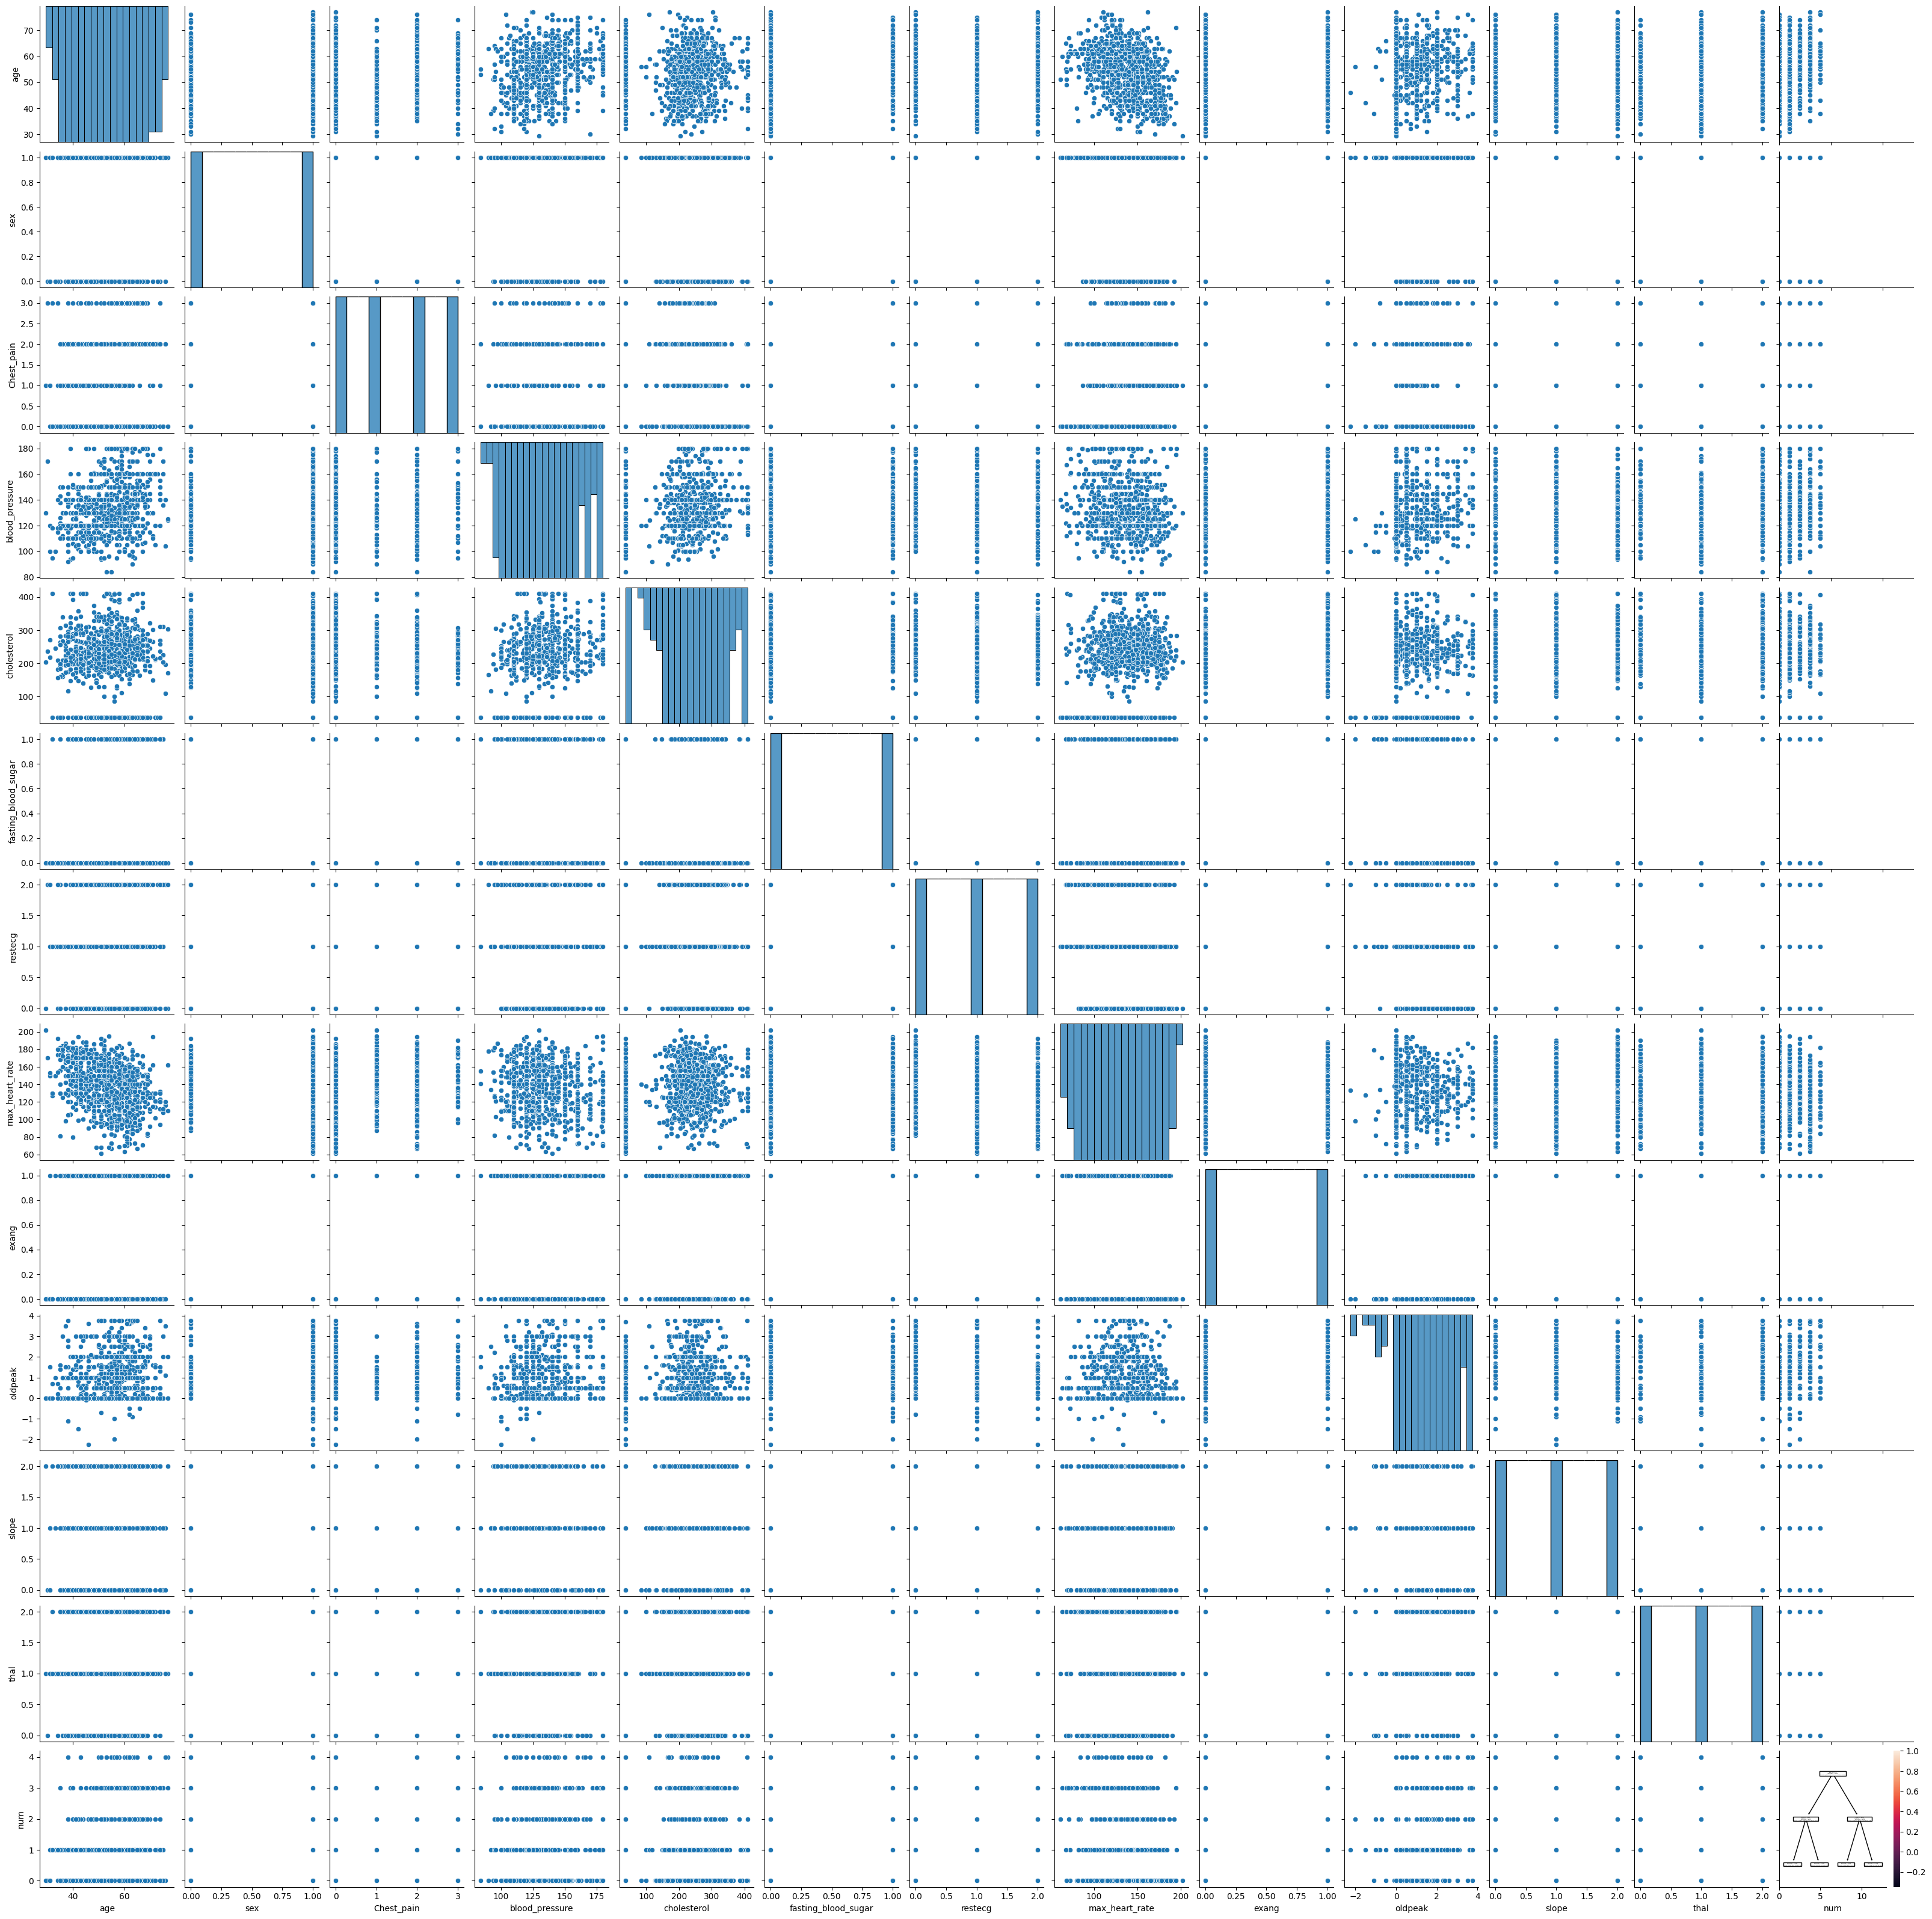

In [1700]:
#PLot the decision tree
tree.plot_tree(model)
plt.show()

In [1701]:
y_train.value_counts()

num
0    323
1    210
2     87
3     84
4     22
Name: count, dtype: int64

In [1706]:
# age	sex	Chest_pain	blood_pressure	cholesterol	fasting_blood_sugar	restecg	max_heart_rate	exang	oldpeak	slope	thal	num

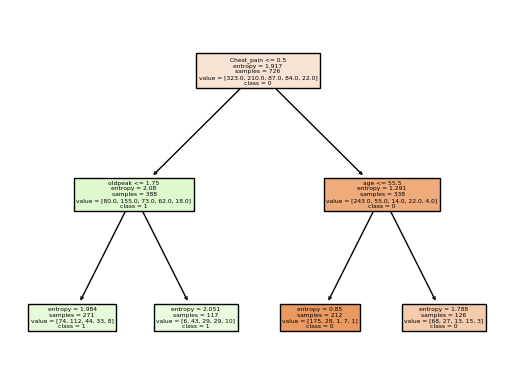

In [1708]:
fn=['age',	'sex',	'Chest_pain',	'blood_pressure',	'cholesterol',	'fasting_blood_sugar',	'restecg',	'max_heart_rate',	'exang',	'oldpeak',	'slope',	'thal'] # Feature names
cn=['0','1','2','3'] # Class names
#fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);
plt.show()

In [1710]:
# most importatnt feature :- chest_pain  , split for the class 0
# oldpeak and age , as 2nd most importatnt feature

In [1712]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

1    107
0     75
Name: count, dtype: int64

In [1714]:
model.feature_importances_ 

array([0.1482157 , 0.        , 0.71062374, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.14116055,
       0.        , 0.        ])

In [1716]:
preds.shape

(182,)

In [1718]:
y_test.shape

(182,)

In [1720]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions. Actual 1 - but it is predicted as 2

col_0,0,1
num,,
0,53,23
1,13,42
2,6,16
3,2,21
4,1,5


In [1722]:
# Accuracy
np.mean(preds==y_test)

0.521978021978022

Building Decision Tree Classifier (CART) using Gini Criteria

6. Model Evaluation and Analysis:
Analyse the performance of the Decision Tree model using the evaluation metrics obtained.
Visualize the decision tree structure to understand the rules learned by the model and identify important features


In [1726]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion = 'gini',max_depth=3, random_state=0)

In [ ]:
model_gini.fit(x_train, y_train)

In [ ]:
#Prediction and computing the accuracy
pred=model_gini.predict(x_test)
np.mean(pred==y_test)

In [ ]:
 from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test,preds))
print("Precision:", precision_score(y_test,preds))
print("Recall:", recall_score(y_test,preds))
print("F1-score:", f1_score(y_test,preds))
print("ROC-AUC Score:", roc_auc_score(y_test,preds))

Interview Questions:


1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance

max_depth: Controls the maximum depth of the tree. A deeper tree can capture complex patterns but might overfit.
min_samples_split: Sets the minimum number of samples required to split an internal node.
min_samples_leaf: Sets the minimum number of samples required to be at a leaf node.   
criterion: Determines the quality of a split (e.g., Gini impurity, entropy).


   ?3
2. What is the difference between the Label encoding and One-hot encodin

 Label Encoding: Assigns a unique integer to each category. Suitable for ordinal categorical variables (e.g., low, medium, high).
One-Hot Encoding: Creates a new binary column for each category. Suitable for nominal categorical variables (e.g., male, female).g?
